<a href="https://colab.research.google.com/github/CodingBad02/Face-Anonymisation/blob/main/PeakyBlinders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###In The name of the **AlgorithmX fellowship**!!!!! 

Manjunathan.R ,
SSN CE


*A note on the Novelty and the implication of this work along with required references for the purpose of the **AlgorithmX** panel:*


1.   This project is implemented **completely online**, uses Google drive as the source for all the files that are required. Done on **Google colab.**

2.   The model I have built is **completely dynamic** in the sense that even the variables that store the representations, are created dynamically, meaning that this could be done for **any** such picture where everyone's face, except Thomas shelby's needs to be anonymised.

3.   The model here uses the **VGG-net** which works wihtout training by using **Siamese network based similarity calculation of images**. We have used two metrics here, namely the Euclidean distance and the Cosine similarity with a threshold of 0.4 and 120 respectively, above which the images are not similar.

4.   This hence, works as a **Image verification** problem, where you know one is Thomas shelby, and you try to match it with the other faces, and blur all, except Thomas' face.
 
5.   This devoids the model of GPU bottlenecking, or any such issues of wasting time. Making it fast!


---
Links:


*   My AlgorithmX drive [link](https://drive.google.com/drive/folders/1IK5gd-vh_D_Po9U0WmEG4KTwZVU2zOIm?usp=sharing)
*   Haar Cascade Classifier XML [file](https://drive.google.com/file/d/1kDa3wLEUPJhUpg16Wx4ULe-02ZVl3ty_/view)
*   My [Resume](https://drive.google.com/file/d/12VsiPM3pAfNSrhc-mfI0WD15O8NSMpSz/view?usp=sharing)
*   Siamese Network Features for Image Matching [paper](https://users.aalto.fi/~kannalj1/publications/icpr2016.pdf)

*   VGG Net architecture [Medium article](https://medium.com/analytics-vidhya/vggnet-architecture-explained-e5c7318aa5b6)



---

Thanks for this opportunity to learn and work!







In [ ]:
#Let's first install OpenCV which will be the backbone for our project.
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [ ]:
#Import Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
root_path = 'gdrive/My Drive/AlgorithmxFellowship' 

In [ ]:
!ls -a "/content/gdrive/MyDrive/AlgorithmxFellowship"

classifier  peakyblinders.jpg  shelby_test.jpg


In [ ]:
!pwd

/content


**Imports**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
#Reading thew Given Image for Anonymisation and further processing:
test_image=cv2.imread('/content/gdrive/MyDrive/AlgorithmxFellowship/peakyblinders.jpg')

In [ ]:
#Ordering the color of the image to RGB and then converting into Grayscale:
test_image=cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
gs_test_image=cv2.cvtColor(test_image,cv2.COLOR_RGB2GRAY)

For detecting the Faces in our model we use a trained Haar cascade classifier which is available at the Open source [Link](https://drive.google.com/file/d/1kDa3wLEUPJhUpg16Wx4ULe-02ZVl3ty_/view) got from the internet

In [ ]:
face_detector=cv2.CascadeClassifier("/content/gdrive/MyDrive/AlgorithmxFellowship/classifier/haarcascade_frontalface_default.xml")

In [ ]:
faces_image= face_detector.detectMultiScale(gs_test_image,1.3,5)

In [ ]:
#Checking whether the output is good or not
faces_image

array([[560,  92,  49,  49],
       [209, 126,  36,  36],
       [131, 124,  47,  47],
       [ 13,  99,  52,  52],
       [377,  98,  51,  51],
       [448, 125,  47,  47],
       [267,  81,  59,  59]], dtype=int32)

We observe that the given images have been reduced into faces. The array corresponds to x_pos,y_pos,height and width of the located BBox of the face.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


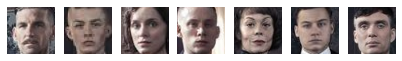

In [ ]:
##Plotting the figures using Matplotlib subplotting

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 10
peaky_face=[]
for i in range(len(faces_image)):
  for (x_pos,y_pos,width,height) in faces_image:
    peaky_face.append(test_image[y_pos:y_pos+height,x_pos:x_pos+width])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(peaky_face[i])
    plt.axis('off')

We have successfully taken out all faces! Now my thought process is to build a classifier based on Thomas shelby's image and pass this to that classifier. If it detects him in a particular frame, we can remove that frame from the list of frames and blur all. This can be dealt as an verification problem rather than a Recognition one



---



---



**Now we shall start building the model. This model is inspired by VGG-Net, Siamese Networks based image deduction, Global dynanmic variable creation**

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Activation, Dense,ZeroPadding2D,Convolution2D,MaxPooling2D,Dropout,Flatten

from keras.models import model_from_json

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

Instead of using Multiple images to train the model, we can use the process of **Image verification** than image identification, just like how it is used in Biometrics in offices. 

The Model we use is the VGG-Face. This Model ois nearly similar to the ImageNet model, however it varies at the output layer an image of size 224x224x3 is made into 2622 encoded values which is used for learning or in our case verification.

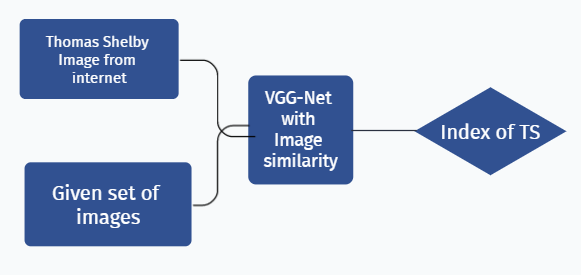

In [ ]:
##Building a VGG network for image identification:

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [ ]:
model.load_weights('/content/gdrive/MyDrive/AlgorithmxFellowship/classifier/vgg_face_weights.h5')

Let's Build an instance of this descriptor!

In [ ]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

Since this takes input in only a particular format, we use preprocessing , both Built in VGG16 as well as self defined ones can be used.

In [ ]:
def preprocess_image(image_path):
  img = image.load_img(image_path, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)
  return img

In [ ]:
for i in range(len(faces_image)):
  im = Image.fromarray(peaky_face[i])
  im.save("face{0}.jpeg".format(i))

In [ ]:
len(peaky_face)

49

Let us create Global Variables to store the value of the faces represented in a 1D vector format. This helps in dynamic modeling

In [ ]:
#Creating global Variables to store the img values of Faces.
i = 0
vals=[]
for j in range(len(faces_image)):
    i += 1
    globals()["facerep" + str(i)] = vgg_face_descriptor.predict(preprocess_image('/content/face{0}.jpeg'.format(j)))[0,:]
    vals.append(vgg_face_descriptor.predict(preprocess_image('/content/face{0}.jpeg'.format(j)))[0,:])
np.shape(vals)

(7, 2622)

Let's verify the shape of the model!

In [ ]:
print(len(facerep1))

2622


We Now have our Test image representations. All we need now is to load an image of Thomas Shelby and try to verify if it is the same person in both the images.

--------------------------------------------------------------------------------------------

**Shelby Image Cornering**

In [ ]:
shelby=cv2.imread('/content/gdrive/MyDrive/AlgorithmxFellowship/shelby_test.jpg')

In [ ]:
shelby1=cv2.cvtColor(shelby,cv2.COLOR_BGR2RGB)
shelby_in_gs=cv2.cvtColor(shelby1,cv2.COLOR_RGB2GRAY)

In [ ]:
shelby_face= face_detector.detectMultiScale(shelby_in_gs,1.3,5)
shelby_face

array([[ 78,  25, 338, 338]], dtype=int32)

In [ ]:
for (x_pos,y_pos,width,height) in shelby_face:
  shelby_img=shelby[y_pos:y_pos+height,x_pos:x_pos+width]

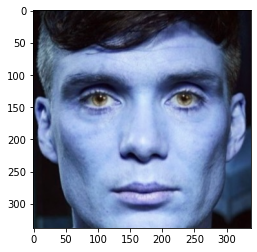

In [ ]:
plt.imshow(shelby_img)

In [ ]:
im = Image.fromarray(shelby_img)
im.save("Shelby.jpeg")

In [ ]:
shelby_representation = vgg_face_descriptor.predict(preprocess_image('/content/Shelby.jpeg'))[0,:]

**End of Shelby Image cornering**



---




Now we have the represntations of the Images in our 1D array format. Now we need to compare the Cosine Similarities and Euclidean similarities which are used in **Siamese Networks**

In [ ]:
def CosineSimilarity(source, test):
  a = np.matmul(np.transpose(source), test)
  b = np.sum(np.multiply(source, source))
  c = np.sum(np.multiply(test, test))
  return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
 
def EuclideanDistance(source, test):
  euclidean_distance = source - test
  euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
  euclidean_distance = np.sqrt(euclidean_distance)
  return euclidean_distance

These two values represent the closeness between the images. If they are pretty close, then they are the same image. If not, they can be considered as a different image. We hence set a threshold for the classification

In [ ]:
thresh_cosine=0.40

In [ ]:
thresh_euclidean=120

In [ ]:
def MatchFace(rep1, rep2):
  cosine_similarity = CosineSimilarity(rep1, rep2)
  euclidean_distance = EuclideanDistance(rep1, rep2)
  if(cosine_similarity < thresh_cosine):
    return True
  else:
    return False

In [ ]:
MatchFace(shelby_representation,facerep7)

True

In [ ]:
MatchFace(shelby_representation,facerep6)

False

In [ ]:
for i in range(len(faces_image)):
  if MatchFace(shelby_representation,vals[i]):
    idx=i


In [ ]:
idx

6



---



**Now onto the final part of our code: The Blurred image output:**

In [ ]:
faces_image.shape

(7, 4)

In [ ]:
number,numberofelems=faces_image.shape

In [ ]:
startlimit=idx*numberofelems
endlimit=(idx+1)*(numberofelems)
iter_idx=np.arange(startlimit,endlimit)

In [ ]:
fin_faces=np.delete(faces_image,iter_idx)

In [ ]:
fin_faces= fin_faces.reshape((number-1,numberofelems))

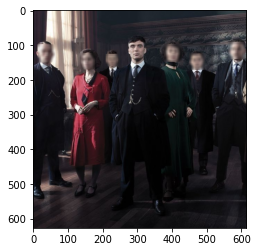

In [ ]:
for (x_pos,y_pos,width,height) in fin_faces:
  test_image[y_pos:y_pos+height,x_pos:x_pos+width]=cv2.blur(test_image[y_pos:y_pos+height,x_pos:x_pos+width],ksize=(10,10))


**FINGERS CROSSED**

(-0.5, 614.5, 626.5, -0.5)

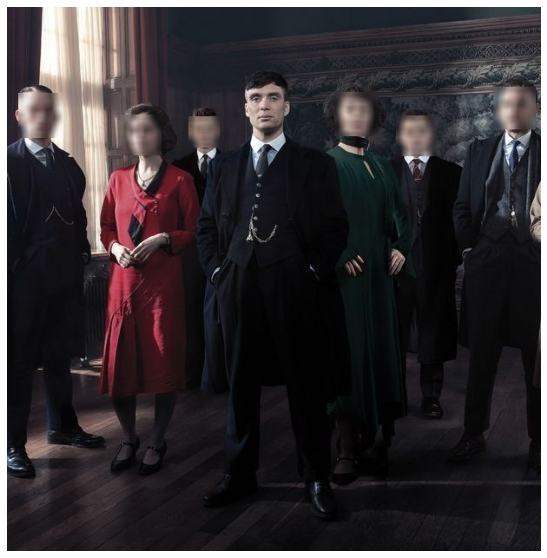

In [ ]:
plt.figure(figsize=(16,10))
plt.imshow(test_image)
plt.axis('off')

**No training. Got them for good.**

In [ ]:
im = Image.fromarray(test_image)
im.save("Anonymised_Image.jpeg")